In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
import plotly.express as px
from eng_helper_code import *

Get the columns that we are interested in

In [14]:
columns_of_interest = ['age', 'educ2', 'web1a', 'web1b', 'web1c', 'sns2a', 'sns2b', 'sns2c']
columns_of_interest2 = ['age', 'educ2', 'web1a', 'web1b', 'web1c', 'sns2a', 'sns2b', 'sns2c']

NSDUH2021Cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]
NSDUH201819Cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]

In [15]:
NSDUH2019_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt", NSDUH201819Cols)
NSDUH2018_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv", NSDUH201819Cols)
NSDUH2021_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt", NSDUH2021Cols)

Get the path of the datasets

In [16]:


nsduh_2018_path = 'datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt'
nsduh_2019_path = 'datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv'
nsduh_2021_path = 'datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt'
core_trends_2018_path = 'datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv'
core_trends_2019_path = 'datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv'
core_trends_2021_path = 'datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv'

In [17]:
# Load the data
data_2021 = pd.read_csv('datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
data_2018 = pd.read_csv('datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv')
data_2019 = pd.read_csv('datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv')



In [18]:
# Extract the relevant data
data_2018 = data_2018[columns_of_interest]
data_2019 = data_2019[columns_of_interest]
data_2021 = data_2021[columns_of_interest]

In [19]:
# Combine the data from different years
combined_data = pd.concat([data_2018, data_2019, data_2021])
# check the data
print(combined_data[['educ2', 'sns2a']].dropna().head())
print(combined_data['educ2'].unique())
print(combined_data['sns2a'].unique())

   educ2 sns2a
0      3      
1     98      
2      5      
3      5      
4      4      
[ 3 98  5  4  7  6  1 99  8  2]
[' ' '2' '1' '4' '5' '3' '8' '9']


In [20]:
# checking for the head to see if there are any Nans

# print(combined_data[['educ2', 'sns2a']].isnull().sum())
# combined_data['educ2'] = combined_data['educ2'].astype(str)
# combined_data['sns2a'] = combined_data['sns2a'].astype(str)

In [21]:
# Define age bins and labels
age_bins = [18, 24, 34, 44, 54, 64, 74, 84, 94, 104]
age_labels = ['18-23', '24-33', '34-43', '44-53', '54-63', '64-73', '74-83', '84-93', '94+']

In [22]:
combined_data['Age Group'] = pd.cut(combined_data['age'], bins=age_bins, labels=age_labels)

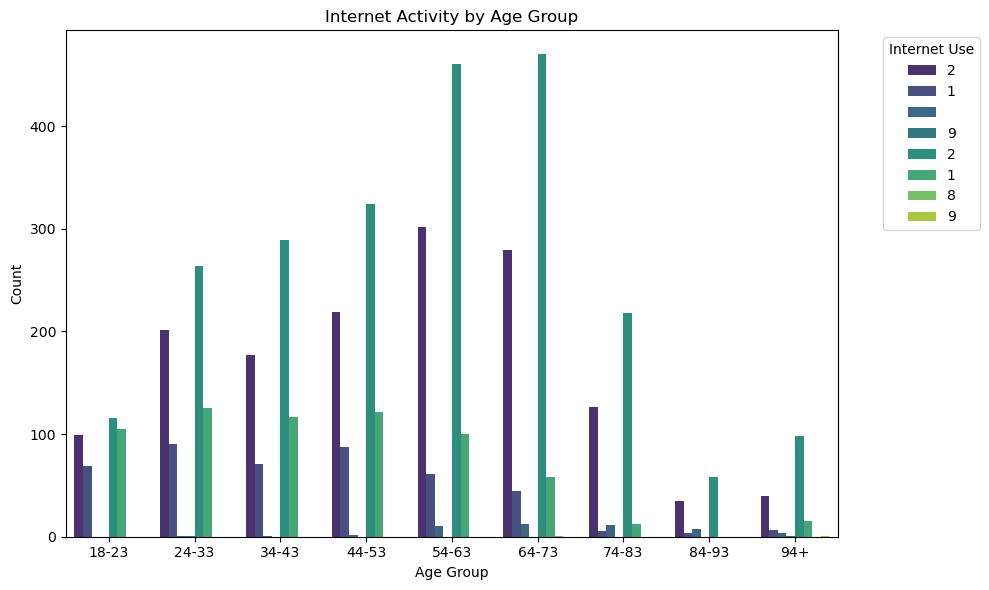

In [23]:
# Visualization: Age Group Technology Engagement
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='web1a', data=combined_data, palette='viridis')
plt.title('Internet Activity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Internet Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Education levels  and social media usage

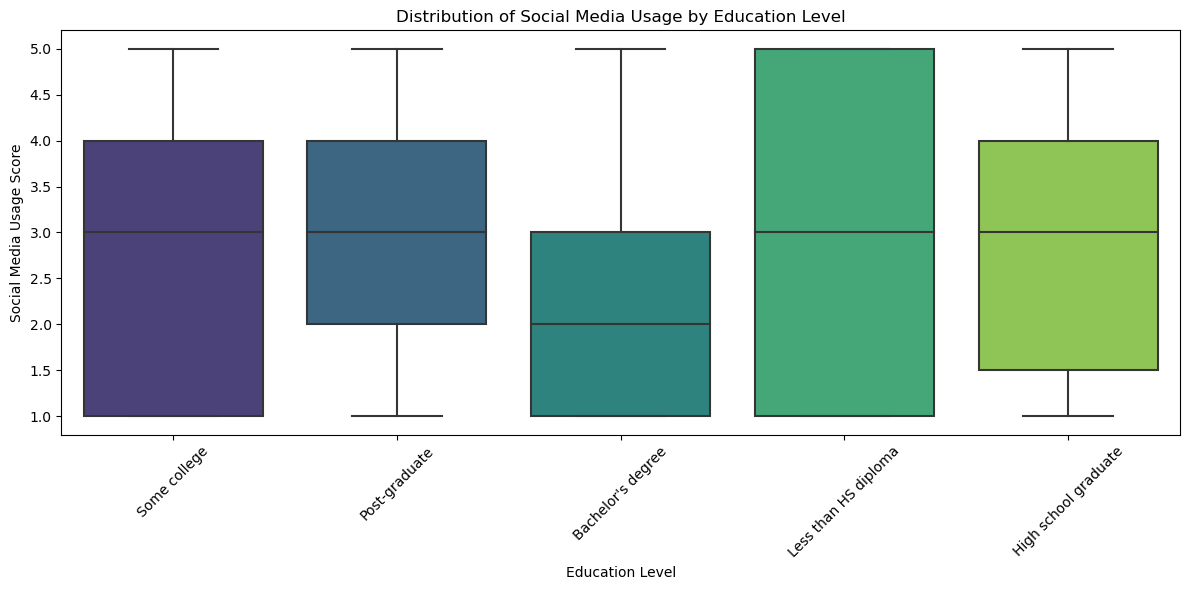

In [24]:
# # Visualization: Education Level and Technology Engagement
# plt.figure(figsize=(10, 6))
# sns.countplot(x='educ2', hue='sns2a', data=combined_data, palette='viridis')
# plt.title('Social Media Usage by Education Level')
# plt.xlabel('Education Level')
# plt.ylabel('Count')
# plt.legend(title='Social Media Use', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

education_level_mapping = {
    1: 'Less than HS diploma',
    2: 'High school graduate',
    3: 'Some college',
    4: 'Bachelor\'s degree',
    5: 'Post-graduate'
}
combined_data['Education Level'] = combined_data['educ2'].map(education_level_mapping)

# Mapping for social media usage categories to scores
social_media_usage_mapping = {
    ' ': 'Not specified', 
    '1': 'Never',
    '2': 'Rarely',
    '3': 'Occasionally',
    '4': 'Frequently',
    '5': 'Always',
    '8': 'Other',
    '9': 'Other' 
}

combined_data['Social Media Usage'] = combined_data['sns2a'].map(social_media_usage_mapping)


social_media_usage_scores = {
    'Not specified': np.nan,  
    'Never': 1,
    'Rarely': 2,
    'Occasionally': 3,
    'Frequently': 4,
    'Always': 5,
    'Other': np.nan 
}

# Apply the scores mapping
combined_data['Social Media Usage Score'] = combined_data['Social Media Usage'].map(social_media_usage_scores)

average_usage_by_education = (
    combined_data.dropna(subset=['Social Media Usage Score'])
    .groupby('Education Level')['Social Media Usage Score']
    .mean()
    .reset_index()
)

#plot the graph
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Education Level', y='Social Media Usage Score', data=average_usage_by_education, palette='viridis')
# plt.title('Average Social Media Usage by Education Level')
# plt.xlabel('Education Level')
# plt.ylabel('Average Social Media Usage Score')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Social Media Usage Score', data=combined_data, palette='viridis')
plt.title('Distribution of Social Media Usage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Social Media Usage Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'NSDUH2018df' is not defined

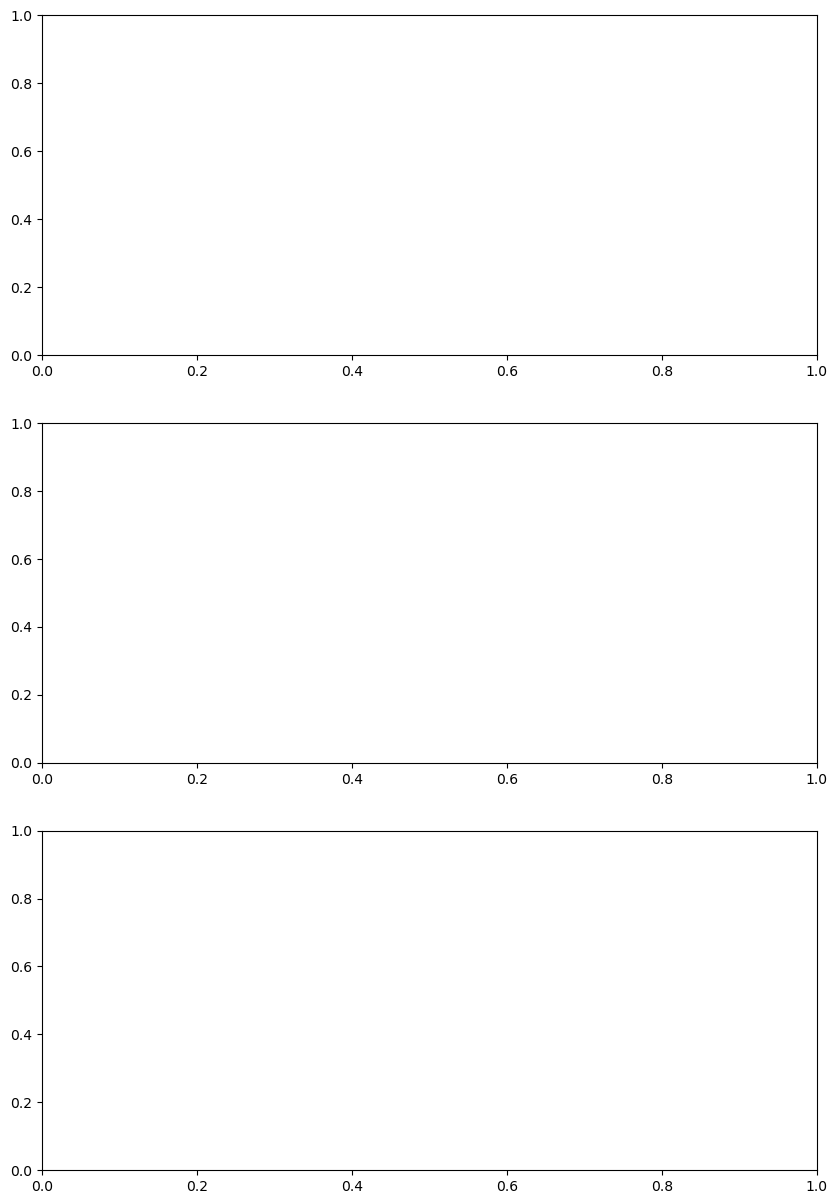

In [25]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for NSDUH 2018
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2018df, ax=axes[0])
axes[0].set_title('Suicidal Thoughts by Age Group (2018)')

# Plot for NSDUH 2019
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2019df, ax=axes[1])
axes[1].set_title('Suicidal Thoughts by Age Group (2019)')

# Plot for NSDUH 2021
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2021df, ax=axes[2])
axes[2].set_title('Suicidal Thoughts by Age Group (2021)')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Set up the figure and axes for subplots
# fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# # Plot for NSDUH 2018
# sns.countplot(x='age', hue='diff_social', data=NSDUH2018df, ax=axes[0])
# axes[0].set_title('Social Media Usage by Age Group (2018)')

# # Plot for NSDUH 2019
# sns.countplot(x='age', hue='diff_social', data=NSDUH2019df, ax=axes[1])
# axes[1].set_title('Social Media Usage by Age Group (2019)')

# # Plot for NSDUH 2021
# sns.countplot(x='age', hue='diff_social', data=NSDUH2021df, ax=axes[2])
# axes[2].set_title('Social Media Usage by Age Group (2021)')

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [ ]:
# Set up the figure and axes
# fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# # Plot for NSDUH 2018
# sns.countplot(x='age', hue='diff_social', data=NSDUH2018df, ax=axes[0], palette='Set1', alpha=0.7)
# sns.countplot(x='age', hue='suicidal_think', data=NSDUH2018df, ax=axes[0], palette='Set2', alpha=0.7)
# axes[0].set_title('Social Media Usage and Suicidal Thoughts by Age Group (2018)')
# axes[0].legend(['Social Media Usage', 'Suicidal Thoughts'])

# # Plot for NSDUH 2019
# sns.countplot(x='age', hue='diff_social', data=NSDUH2019df, ax=axes[1], palette='Set1', alpha=0.7)
# sns.countplot(x='age', hue='suicidal_think', data=NSDUH2019df, ax=axes[1], palette='Set2', alpha=0.7)
# axes[1].set_title('Social Media Usage and Suicidal Thoughts by Age Group (2019)')
# axes[1].legend(['Social Media Usage', 'Suicidal Thoughts'])

# # Plot for NSDUH 2021
# sns.countplot(x='age', hue='diff_social', data=NSDUH2021df, ax=axes[2], palette='Set1', alpha=0.7)
# sns.countplot(x='age', hue='suicidal_think', data=NSDUH2021df, ax=axes[2], palette='Set2', alpha=0.7)
# axes[2].set_title('Social Media Usage and Suicidal Thoughts by Age Group (2021)')
# axes[2].legend(['Social Media Usage', 'Suicidal Thoughts'])

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [27]:
NSDUH2018df = buildNSDUH2018df()
NSDUH2019df = buildNSDUH2019df()
NSDUH2021df = buildNSDUH2021df()
print(NSDUH2018df.head())
print(NSDUH2019df.head())
print(NSDUH2021df.head())


NSDUH2018df['year'] = "2018"
NSDUH2019df['year'] = "2019"
NSDUH2021df['year'] = "2021"

     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  worse_hopeless  \
0             5.0              5.0               5.0  ...             NaN   
1             4.0              5.0               5.0  ...             NaN   
2             2.0              3.0               3.0  ...             2.0   
3             4.0              5.0               5.0  ...             NaN   
4             5.0              5.0               5.0  ...             NaN   

   worse_depressed  worse_worthless  diff_concentration  diff_leavin

In [28]:
NSDUHAlldf = pd.concat([NSDUH2018df, NSDUH2019df, NSDUH2021df])
coreTrends2018df = buildCoreTrends2018df()
coreTrends2019df = buildCoreTrends2019df()
coreTrends2021df = buildCoreTrends2021df()


# Checking and adding 'year' column
try:
    if 'year' not in coreTrends2018df.columns:
        coreTrends2018df['year'] = 2018
    else:
        print("Year already in 2018 DataFrame")

    if 'year' not in coreTrends2019df.columns:
        coreTrends2019df['year'] = 2019
    else:
        print("Year already in 2019 DataFrame")

    if 'year' not in coreTrends2021df.columns:
        coreTrends2021df['year'] = 2021
    else:
        print("Year already in 2021 DataFrame")
except Exception as e:
    print("Error adding year:", str(e))

coreTrendsAlldf = pd.concat([coreTrends2018df, coreTrends2019df, coreTrends2021df])



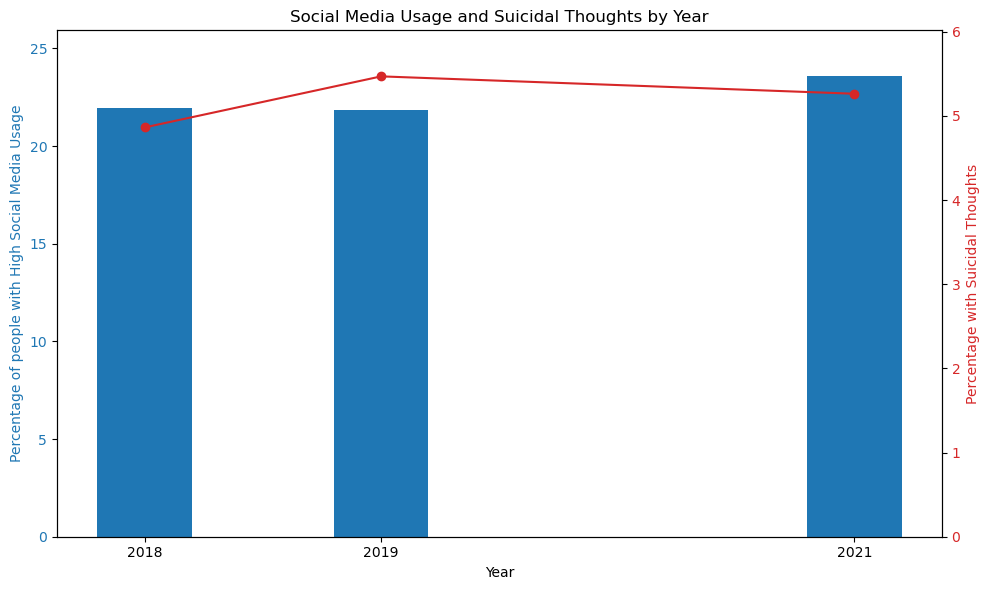

In [29]:
def plot_combined_social_media_and_suicidal_thoughts_improved(coreTrends, nsduh):
    coreTrends['year'] = coreTrends['year'].astype(int)
    nsduh['year'] = nsduh['year'].astype(int)
    
    # Filter for the years 
    social_media_usage = coreTrends[coreTrends['year'].isin([2018, 2019, 2021])]
    suicidal_thoughts = nsduh[nsduh['year'].isin([2018, 2019, 2021])]
    
    # Calculate sns_sum 
    if 'sns_sum' not in social_media_usage.columns:
        sns_columns = social_media_usage.filter(like='Sns_').columns
        sns_columns = sns_columns.drop('Sns_YouTube', errors='ignore')
        social_media_usage['sns_sum'] = social_media_usage[sns_columns].sum(axis=1)

    # Calculate percentages
    social_media_usage = social_media_usage.groupby('year')['sns_sum'].apply(lambda x: (x >= 5).mean() * 100).reset_index(name='percentage_social_media')
    suicidal_thoughts = suicidal_thoughts.groupby('year')['suicidal_think'].apply(lambda x: (x == 1).mean() * 100).reset_index(name='percentage_suicidal_thoughts')

    merged_data = pd.merge(social_media_usage, suicidal_thoughts, on='year', how='outer')

    #plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Social Media Usage as bars
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Percentage of people with High Social Media Usage', color='tab:blue')
    ax1.bar(merged_data['year'], merged_data['percentage_social_media'], color='tab:blue', width=0.4, label='Social Media Usage')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Suicidal Thoughts as a line
    ax2 = ax1.twinx()
    ax2.set_ylabel('Percentage with Suicidal Thoughts', color='tab:red')
    ax2.plot(merged_data['year'], merged_data['percentage_suicidal_thoughts'], color='tab:red', marker='o', label='Suicidal Thoughts')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Social Media Usage and Suicidal Thoughts by Year')

    # Set x-ticks
    ax1.set_xticks([2018, 2019, 2021])

    #y axis
    ax1.set_ylim(0, max(merged_data['percentage_social_media']) * 1.1)  # Adjust y-axis scale to fit data
    ax2.set_ylim(0, max(merged_data['percentage_suicidal_thoughts']) * 1.1)

    fig.tight_layout()  # To prevent label cutoff
    plt.show()


plot_combined_social_media_and_suicidal_thoughts_improved(coreTrendsAlldf, NSDUHAlldf)


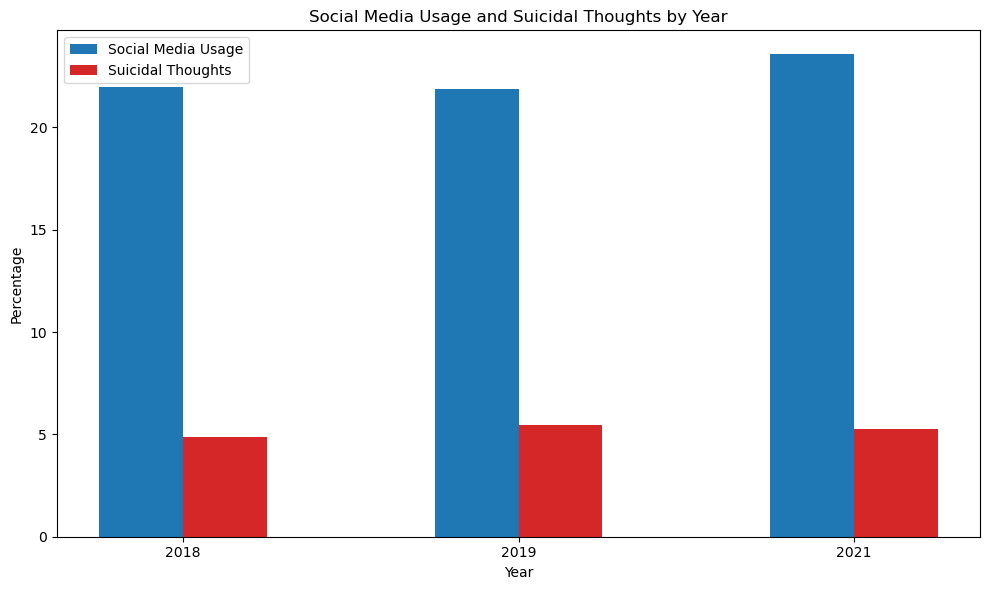

In [30]:
def plot_combined_social_media_and_suicidal_thoughts_grouped(coreTrends, nsduh):
    coreTrends['year'] = coreTrends['year'].astype(int)
    nsduh['year'] = nsduh['year'].astype(int)
    
    social_media_usage = coreTrends[coreTrends['year'].isin([2018, 2019, 2021])]
    suicidal_thoughts = nsduh[nsduh['year'].isin([2018, 2019, 2021])]
    
    if 'sns_sum' not in social_media_usage.columns:
        sns_columns = social_media_usage.filter(like='Sns_').columns
        sns_columns = sns_columns.drop('Sns_YouTube', errors='ignore')
        social_media_usage['sns_sum'] = social_media_usage[sns_columns].sum(axis=1)
    
    social_media_usage = social_media_usage.groupby('year')['sns_sum'].apply(lambda x: (x >= 5).mean() * 100).reset_index(name='percentage_social_media')
    suicidal_thoughts = suicidal_thoughts.groupby('year')['suicidal_think'].apply(lambda x: (x == 1).mean() * 100).reset_index(name='percentage_suicidal_thoughts')
    
    merged_data = pd.merge(social_media_usage, suicidal_thoughts, on='year', how='outer')
    
    # Set position of bar on X axis
    r1 = np.arange(len(merged_data['year']))
    r2 = [x + 0.25 for x in r1]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Make the bar plots
    bars1 = ax.bar(r1, merged_data['percentage_social_media'], color='tab:blue', width=0.25, label='Social Media Usage')
    bars2 = ax.bar(r2, merged_data['percentage_suicidal_thoughts'], color='tab:red', width=0.25, label='Suicidal Thoughts')
    
    #draw label
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title('Social Media Usage and Suicidal Thoughts by Year')
    ax.set_xticks([r + 0.125 for r in range(len(r1))])
    ax.set_xticklabels(merged_data['year'])
    ax.legend()
    
    fig.tight_layout()
    plt.show()

plot_combined_social_media_and_suicidal_thoughts_grouped(coreTrendsAlldf, NSDUHAlldf)

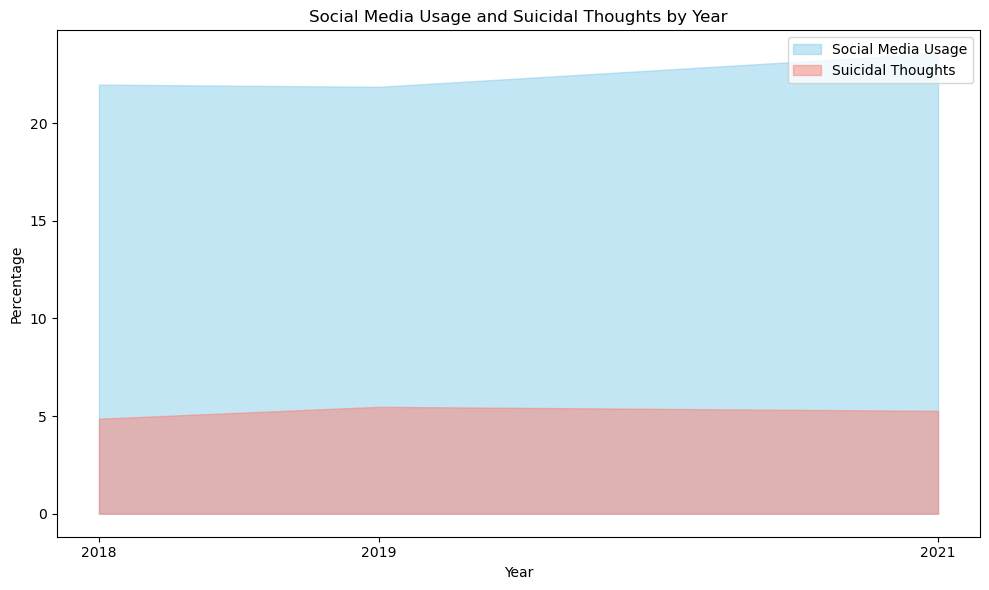

In [31]:
def plot_combined_social_media_and_suicidal_thoughts_area(coreTrends, nsduh):
    coreTrends['year'] = coreTrends['year'].astype(int)
    nsduh['year'] = nsduh['year'].astype(int)
    
    social_media_usage = coreTrends[coreTrends['year'].isin([2018, 2019, 2021])]
    suicidal_thoughts = nsduh[nsduh['year'].isin([2018, 2019, 2021])]
    
    if 'sns_sum' not in social_media_usage.columns:
        sns_columns = social_media_usage.filter(like='Sns_').columns
        sns_columns = sns_columns.drop('Sns_YouTube', errors='ignore')
        social_media_usage['sns_sum'] = social_media_usage[sns_columns].sum(axis=1)
    
    social_media_usage = social_media_usage.groupby('year')['sns_sum'].apply(lambda x: (x >= 5).mean() * 100).reset_index(name='percentage_social_media')
    suicidal_thoughts = suicidal_thoughts.groupby('year')['suicidal_think'].apply(lambda x: (x == 1).mean() * 100).reset_index(name='percentage_suicidal_thoughts')
    
    merged_data = pd.merge(social_media_usage, suicidal_thoughts, on='year', how='outer')
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    #
    ax.fill_between(merged_data['year'], merged_data['percentage_social_media'], color='skyblue', alpha=0.5, label='Social Media Usage')
    
    #
    ax.fill_between(merged_data['year'], merged_data['percentage_suicidal_thoughts'], color='salmon', alpha=0.5, label='Suicidal Thoughts')
    
    # Draw labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title('Social Media Usage and Suicidal Thoughts by Year')
    
    # Set x-ticks
    ax.set_xticks(merged_data['year'])
    ax.set_xticklabels(merged_data['year'])
    
    ax.legend()
    
    fig.tight_layout()
    plt.show()
plot_combined_social_media_and_suicidal_thoughts_area(coreTrendsAlldf, NSDUHAlldf)

In [32]:
def plot_social_media_usage(df, year, age_bins, ax, color, linestyle='-'):

    df['age'] = pd.to_numeric(df['age'], errors='coerce').dropna()
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
    df['high_sns_use'] = df.filter(like='Sns_').sum(axis=1) >= 5
    # Calculate the percentages
    sm_percentage = df.groupby('age_group')['high_sns_use'].mean() * 100
    sm_percentage = sm_percentage.reset_index().rename(columns={0: 'age_group'})
    sm_percentage['age_group'] = sm_percentage['age_group'].astype(str) 
    sm_percentage['percentage'] = sm_percentage['high_sns_use']
    
    # Plot
    sns.lineplot(data=sm_percentage, x='age_group', y='percentage', ax=ax, 
                 label=f'High Social Media Usage {year}', color=color, linestyle=linestyle)

In [68]:
def plot_suicidal_thoughts(df, year, age_bins, ax, color, linestyle='--'):

    df['suicidal_thoughts'] = df['suicidal_think'] == 1
    

    # Group by 'age_group' and calculate the sum of 'suicidal_thoughts'
    group_counts = df.groupby('age')['suicidal_thoughts'].sum()
    total_counts = df.groupby('age').size()
    # Calculate the percentage of individuals with suicidal thoughts in each age group
    percentages = (group_counts / total_counts) * 100
    percentages = percentages.reset_index(name='percentage')

    percentages['Moving Avg'] = percentages['percentage'].rolling(window=3, min_periods=1).mean()

    sns.lineplot(data=percentages, x='age', y='Moving Avg', ax=ax, 
                 label=f'Suicidal Thoughts {year}', color=color, linestyle=linestyle)

/var/folders/gb/6lz7ywcj7bv70m1184dmt2ym0000gn/T/ipykernel_93030/3319366225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce').dropna()
/var/folders/gb/6lz7ywcj7bv70m1184dmt2ym0000gn/T/ipykernel_93030/3319366225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
/var/folders/gb/6lz7ywcj7bv70m1184dmt2ym0000gn/T/ipykernel_93030/3319366225.py:5: SettingWithCopyWarning: 
A value is tryin

     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  worse_worthless  \
0             5.0              5.0               5.0  ...              NaN   
1             4.0              5.0               5.0  ...              NaN   
2             2.0              3.0               3.0  ...              1.0   
3             4.0              5.0               5.0  ...              NaN   
4             5.0              5.0               5.0  ...              NaN   

   diff_concentration  diff_leaving_house  diff_strangers  dif

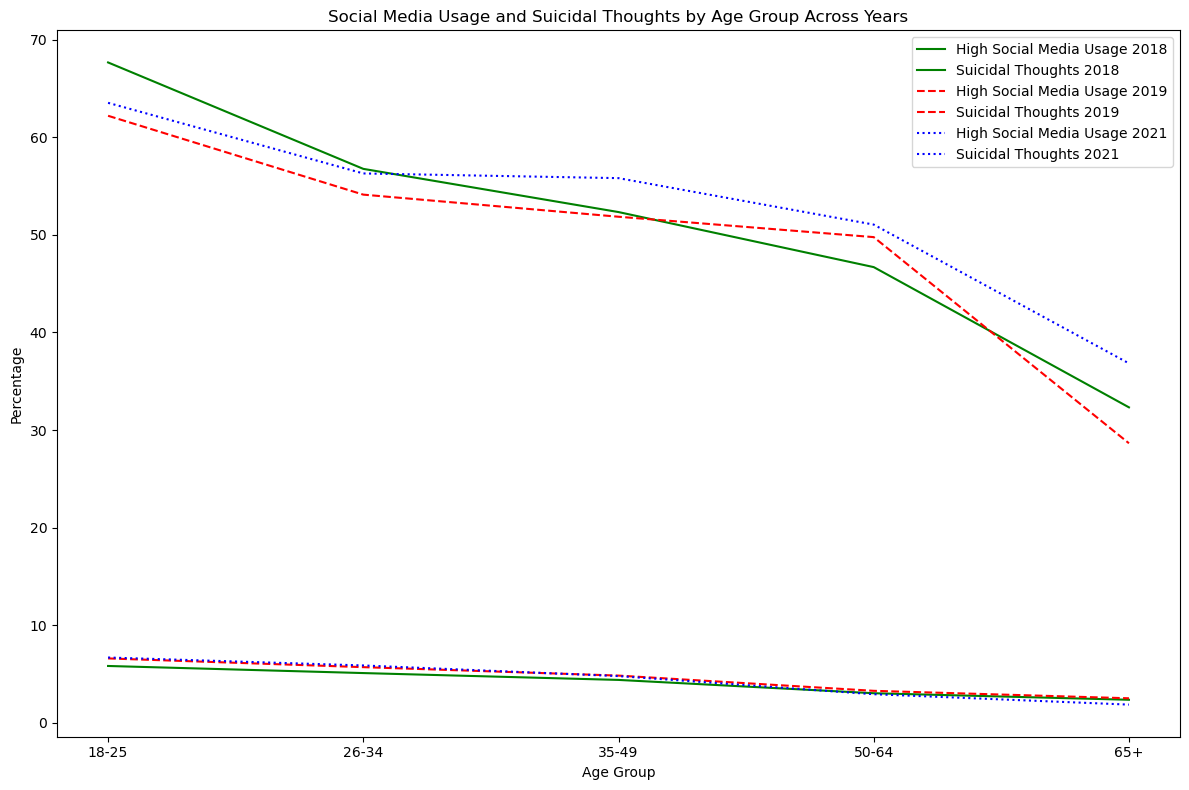

In [69]:
age_bins = [0, 25, 34, 49, 64, float('inf')]
age_labels = ['18-25', '26-34', '35-49', '50-64', '65+']
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['green', 'red', 'blue']
linestyles = ['-', '--', ':']

for i, year in enumerate([2018, 2019, 2021]):
    plot_social_media_usage(coreTrendsAlldf[coreTrendsAlldf['year'] == year], year, age_bins, ax, colors[i], linestyles[i])
    plot_suicidal_thoughts(NSDUHAlldf[NSDUHAlldf['year'] == year], year, age_bins, ax, colors[i], linestyles[i])

ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage')
ax.set_title('Social Media Usage and Suicidal Thoughts by Age Group Across Years')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()